# 参加者間のネットワークについて

例2の結論でも述べたように、すべての発言者が$[0,1]$の間の一様な乱数を発言として発するという設定では、参加者の違いや距離などは全く寄与しない。
したがって、次に考えることは個人間のリンクにおいて成り立つ関係はどのようになっているかということである。
ここでも、まずは先行研究としてなされていることも多いと思われるので、そのまとめと一般化、それから簡単なオリジナルの場合を考えることにする。
最終的な結論に行き着くために、これら個人間のリンクについての性質をまとめておき、その後にそれを反映した評価関数や閾値などを設定することにする。

時刻$k$に$i$が発言を行い、その後時刻$k+1$に$j$が発言$x_{k+1}^{j}$を行う確率$p_{k}(i,j)$を

$$p_{k}(i,j) = \frac{g_{k}(d_{ij})}{\sum_{j} g_{k}(d_{ij})}$$

として考えていた。

これは適応度モデルと違い、(初期のやりとりを新たなノードの追加と見なさなければ)新たなノードを追加することはない。
また、はじめにスケールフリー性と呼ばれる性質を導くネットワークを作るものとなったWSモデルとも、そのモデルでは枝のつなぎかえの操作であるのに対して、こちらは最初からリンクの数を増やしていく点で異なる。修正WSモデルでは、少数の新たな枝を追加するようにしているが、そのオーダーなどから考えても、現在考えているモデルとは異なることに留意すべきである。

~~さて、現段階(2014/12/09)で良さそうな先行研究なども見つかりそうになかったので~~
(複雑ネットワークは基本的にノードを増やしていく操作を行っている。これはむしろ意見の作るネットワークに対して適用すべき事柄である。)
、上のような場合を考えるために、設定を別の視点から見直して、シミュレーションしやすい設定に変える。

$n$人の参加者がいるときに、発言者$i$を、アルファベット$A=\{0, \dots , n-1\}$の一点と考え、確率変数$x\in A$で表すことにする。次にこうしてラベリングされた参加者を円周上に並べる(図)。

<img src=circle_walk1.jpg width=200 />

このとき点$i$から時計回りに$a$目盛進む確率を$p_{i}(a)$と書くことにすると、進む目盛を確率変数$X$で表した時、$X$に対する確率密度関数は$p_{i}(X)$と書ける。
また、ここで$X\in \{ 0, \dots , n\} = A$である。

ここで、時刻$k$の粒子の位置を$x_{k}$として、その確率過程を式で表すと

$$x_{k+1} = x_{k} + X \mod n$$

となる。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import operator

def accumulate(iterable, func=operator.add):
    """Return running totals
    
    Usage:
    accumulate([1,2,3,4,5]) --> 1 3 6 10 15
    accumulate([1,2,3,4,5], operator.mul) --> 1 2 6 24 120
    """
    it = iter(iterable)
    total = next(it)
    yield total
    for element in it:
        total = func(total, element)
        yield total

def circle_walk(P, n=6, i=0, K=100):
    '''
    alternative view of malkov chain
    
    [Keyword arguments] = [default value]:
    n = 6   -- a number of participants
    i = 0   -- initial condition
    K = 100 -- trial
    '''
    k = 0
    speaker = [] # time series of participants
    speaker.append(i)

    def gonext(i):
        w = list(accumulate(P[i])) # create weight list
        rn = np.random.rand()
        for j, _w in enumerate(w):
            if rn <= _w:
                return j

    while True:
        if k+1 > K:
            break
        k += 1
        i = (i + gonext(i))%n
        speaker.append(i)
    return speaker

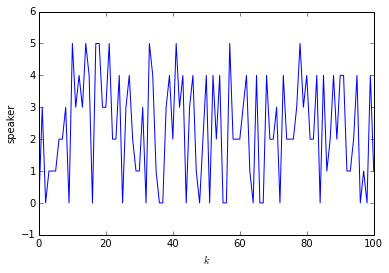

In [2]:
n = 6 # a number of participants
K = 100 # trial

p = np.random.rand(n) # random probability P_{X}: prob X
s = np.sum(p)
pp = p/s

P = []
for i in range(n):
    P.append(np.roll(pp, i))
P = np.reshape(P, (n,n))

ans = circle_walk(P, n=n, i=0, K=K)
plt.plot(range(K+1), ans)
plt.xlabel(r'$k$')
plt.ylabel('speaker')
plt.ylim(-1, n)
plt.show()

-----
(2014/12/10)上に述べたようなモデルはマルコフ連鎖で表すことができた。

(引用)マルコフ連鎖のシミュレーション(山本浩・森隆一・藤曲哲郎, シミュレーションによる確率論, 日本評論社, 137-143, 1993.)

## マルコフ連鎖のシミュレーション

時間と共にランダムな変化をする現象を考える。このような例として、バクテリアの増殖、天候の変化、人口の増減などが挙げられる。これらの現象をモデル化するときには、適当な単位時間を設定し、この何倍かの時刻$n$での状態$X_{n}$を調べる。単位時間としては1時間、1日、1年、1世代などが考えられ、もんっ第二より適切なものを選ぶ。確率論論としては確率変数列$X_{0}, X_{1}, \cdots ,X_{n}, \cdots$を取り扱うことになる。

各確率変数$X_{n}$は問題により人数、位置などをあらわす。$X_{n}$のとり得る値全体の集合を状態空間といい、$S$であらわす。6章では$S$は自然数全体、または、その有限の部分集合として定式化できる問題を取り扱う。

$\{X_{n}\}=\{X_{n}: n=0, 1, \cdots\}$に対して、時刻$n+1$の状態$X_{n+1}$の状態$X_{n+1}$は時刻$n-1$までの状態には関係せず、時刻$n$での状態$X_{n}$だけで決まると仮定する。この仮定はマルコフ性とよばれ、現在が与えられたとき過去と現愛は独立であると表現できる。これにより、現在の状態がわかれば未来(次の時刻)の状態を過去の状態に依存せずに確率的に求めることができる。したがって、計算機を用い、乱数の値により一定の操作を繰り返すことにより$\{X_{n}\}$のシミュレーションが容易に実行できる。

一般に確率変数列$\{X_{n}\}$に対して、$X_{n}$または$\displaystyle M_{n} = \frac{X_{0} + X_{1} + \cdots + X_{n-1}}{n}$のどちらかの確率変数の$n\rightarrow \infty$としたときの状態が問題となる。$X_{n}$が収束すれば$M_{n}$は同じ極限に収束するが、逆は成り立たない。したがって、モデルによりどちらかの確率変数を取り上げる。

6.1節ではマルコフ連鎖$X_{n}$の説明と記号の準備を行う。6.2節では、現金引き出し機の順番を待つ人の数を扱ったモデルを取り上げ、$M_{n}$の収束を問題とする。6.3節ではランダムウォークを取り扱い、$X_{n}$の$n\rightarrow \infty$の状態を考える。6.4節では個体が出生死滅していく集団の個体数を扱った人口モデルを取り上げ、集団が死滅するか個体数が爆発するかを問題とする。

### 6．1 マルコフ連鎖

この章の所で述べた$\{X_{n}\}$に対するマルコフ性という仮定を、条件付き確率を用いて数学的に定式化しよう。

**定義 1** 確率変数$\{X_{n} :n=0,1,2, \cdots\}$が次の性質(マルコフ性)をもつとき、**マルコフ連鎖**とよぶ:

>任意の$n$個の状態$i_{0}, i_{1}, \cdots ,i_{n-1}$と2個の状態$i,j$に対して、
>$$P(X_{n+1}=j|X_{0}=i_{0}, \cdots, X_{n-1} = i_{n-1}, X_{n} = i) = P(X_{n+1}=j|X_{n}=i)$$
>このとき、上の条件付き確率を$p(i,j;n)$とあらわし、**時刻$n$での遷移確率**とよぶ。

定義より$p(i,j;n)$は時刻$n$で状態$i$にいるという条件の下で、次の時刻$n+1$に状態$j$へと移る確率である。$p(i,j;n)$を$(i,j)$成分とする行列$P(n) = (p(i,j;n))_{i,j}$が定義でき、この行列$P(n)$を**と呼ぶ時刻$n$での遷移行列**という。

$P(n)=(p(i,j;n))_{i,j}$が$n$に依存しないとき、$\{X_{n}\}$を時間的に一様なマルコフ連鎖という。この場合はパラメータ$$nの必要性がないので単に遷移行列、遷移確率とよび、$P,p(i,j)$とあらわすことにする。6章では、この時間的に一様なマルコフ連鎖を取り扱う。

$\pi(j) = P(X_{0} = j), j\in S,$で与えられる状態空間$S$上の確率分布$\pi$をマルコフ連鎖の初期分布という。

時刻$1$での分布$P(X_{1}=j)$を考えよう。任意の$j$に対して、
$$\{X_{1} = j\} = \bigcup_{k}\{X_{0} = k, X_{1}=j\}$$
右辺の各集合は$k$に対して互いに背反であるから、
$$\begin{align}
P(X_{1} = j) &= \sum_{k}P(X_{0}=k, X_{1}=j)\\
&= \sum_{k} P(X_{0} = k)P(X_{1} =j|X_{0}=k)\\
&= \sum_{k} \pi(k)p(k,j).
\end{align}$$

$\pi$を行ベクトルと考えれば、最後の行は行ベクトル$\pi P$の$j$成分であり、次の補題が成立する。

**補題 1** $P(X_{1} = j) = (\pi P)(j) = \sum_{k}\pi(k)p(k,j)\ \ (j\in S).$ 

**例 1** 3.3節例題6は時間的に一様なマルコフ連鎖である。この例では単位時間として親から子供への1世代をとる。親から2ステップ後の結果とは、孫が大学に入るとき理工系か文科系かをあらわす。

状態空間$S$は$\{0=\text{理工系}, 1=\text{文科系}\}$、遷移確率は

$$p(0,0) = 0.5,\ p(0,1) = 0.5,\ p(1,0) = 0.2,\ p(1,1) = 0.8$$

遷移行列は、

$$P = \left(\begin{array}{cc} 0.5 & 0.5 \\ 0.2 & 0.8 \end{array}\right) .$$


各世代が大学で専攻する割合を次のように行ベクトルで表示する。
$$(\text{理工系の確率}\ \ \text{文科系の確率})$$
親が理工系であることは、初期分布が行ベクトル$(1\ 0)$であると言い換えられ、補題1より、子供が専攻する確率は$(1\ 0)P = (0.5\ 0.5)$である。

定義より$p(i,j)$は非負であり、任意の$i$に対して次の等式が成り立つ。
$$\sum_{j}p(i,j) = 1.$$
ここで、遷移行列という概念を行列の性質として(再)定義しよう。

**定義 2** すべての成分が非負で、任意の行列に関する和が1となる行列を**確率行列**という。

マルコフ連鎖が与えられたとき、遷移行列と初期分布が定まる。1．3節で適当な標本空間$\Omega$での事象に対して加算加法性をもつ集合関数として確率$P(\cdot)$を定義した。マルコフ連鎖を取り扱う場合、$X_{n}$の各時刻で$n$での値$x_{n}(n=0,1,\cdots)$を順に並べた$(x_{0},x_{1},\cdots , x_{n}, \cdots)$を標本点と考える。したがって、標本空間$\Omega$を状態空間$S$の元の無限列全体とし、$\omega\in \Omega$に対して$X_{n}(\omega)$は$\omega$のf第$n$座標とする($n$は$0$より始める)。この場合、$\Omega$は一定のものであるから、定義1でのマルコフ性は確率$P$に対する仮定となる。このとき、次の定理が成り立つ。

**定理 1** 確率行列$P$と分布$\pi$が与えられたとき、任意の$n$と状態空間の$n+1$個の点$j_{0},j_{1},\cdots ,j_{n}$に対して、
$$P(X_{0} = j_{0}, X_{1} = j_{1}, \cdots , X_{n} =j_{n}) = \pi(j_{0})p(j_{0},j_{1})\cdots p(j_{n-1}, j_{n})$$
をみたす$\Omega$上の確率$P$がただ1つ存在する。

この定理はマルコフ連鎖を数学的に扱う場合に基本となる定理である。証明には測度論的な考えが必要となり、ここでは省略する。

**系** 定理1で定まる$P$に対して、$\{X_{n}\}$は$\pi$を初期分布、$P$を遷移行列とするマルコフ連鎖である。

**証明** 定理1の条件式で$n=0$とすることにより、$\pi$は初期分布となる。遷移行列を計算する。
$$\begin{align}P(X_{n+1} &= j | X_{0} = i_{0}, \cdots, X_{n-1} = i_{n-1}, X_{n}=i)\\
&= \frac{P(X_{0} = i_{0}, \cdots , X_{n-1} = i_{n-1}, X_{n}=i, X_{n+1} = j)}{P(X_{0} = i_{0}, \cdots, X_{n-1} = i_{n-1}, X_{n}=i)}\\
&= \frac{\pi(i_{0})p(i_{0},i_{1})\cdots p(i_{n-1},i_{n})p(i,j)}{\pi(i_{0})p(i_{0},i_{1})\cdots p(i_{n-1}, i)}\\
&= p(i,j)\ \ \ \blacksquare
\end{align}$$

**補題 2** $P = (p(i,j))$を遷移行列とするとき、$P^{n}$も遷移行列となる。 

**証明** 行列$P^{n}$の$(i,j)$成分を$p^{(n)}(i,j)$とすれば、示すべきことは、すべての$n$に対し$\sum_{j}p^{(n)}(i,j) = 1$であり、これを$n$についての数学的帰納法で証明する。$n=1$の場合は、遷移行列の定義式であり、明らかである。

いま$n$まで等式が成立していると仮定する。$P^{n+1} = P\cdot P^{n}$より、

$$\begin{align}\sum_{j} p^{(n+1)}(i,j) &= \sum_{j}\sum_{k}p(i,k)p^{(n)}(k,j)\\
&= \sum_{k}p(i,k)\sum_{j}p^{(n)}(k,j) = \sum_{k}p(i,k) = 1.\ \ \ \blacksquare \end{align}$$

状態空間の$n+1$個の点$j_{0}, \cdots ,j_{n}$に対して、事象$A_{j_{0}, \cdots ,j_{n}}$を次で定義する。

$$A_{j_{0}\cdots ,j_{n}} = \{ X_{0} = j_{0}, \cdots , X_{n}=j_{n}\}.$$

$\pi(i) = P(X_{0} = i)>0$と仮定する。条件付き確率の定義より、

$$P(A_{j_{0},\cdots , j_{n}} | X_{0} = i) = \frac{P(A_{j_{0}, \cdots , j_{n}} \cap \{ X_{0} = i \} )}{ P(X_{0} = i) }$$

このとき、

(1) $j_{0} = i$の場合、

$$\begin{align}
A_{ j_{0}, \cdots , j_{n} } \cap \{ X_{0} = i \} &= A_{ j_{0}, \cdots , j_{n} },\\
P(A_{ j_{0}, \cdots , j_{n} } | X_{0} = i) &= p(j_{0}, j_{1}) \cdots p(j_{n-1}, j_{n}).
\end{align}$$

(2) $j_{0} \neq i$の場合、$A_{j_{o}\cdots, j_{n}} \cap \{X_{0} = i\} = \phi,\ P(A_{j_{0},\cdots ,j_{n}} | X_{0} =i) = 0.$上の結果を定理としてまとめる。

**定理 2** $\pi(i) >0$とするとき、
$$P(A_{j_{0}\cdots ,j_{n}} | X_{0} = i) = \left\{ \begin{array}{ll}
p(j_{0},j_{1})\cdots p(j_{n-1},j_{n}) & i=j_{0}\text{の場合},\\
0 & i\neq j_{0}\text{の場合}.
\end{array}\right.$$
左辺の条件付き確率は状態$i$より出発した場合の条件付き確率であるから、$\pi(i) = P(X_{0} =i) =0$の場合には左辺は意味をもたないが、右辺は$\pi(i)$の値に関係なく意味をもつ。右辺を条件付き確率$P(A_{j_{0}\cdots ,j_{n}} | X_{0} = i) = P_{\{X_{0} =i\}}(A_{j_{0}\cdots ,j_{n}})$と区別するために$P_{i}$と書きあらわす。これを定義としてまとめよう。

**定義 3**
$$P_{i}(A_{j_{0}\cdots ,j_{n}}) = \left\{ \begin{array}{ll}
p(j_{0},j_{1})\cdots p(j_{n-1},j_{n}) & i=j_{0}\text{の場合},\\
0 & i\neq j_{0}\text{の場合}.
\end{array}\right.$$

**系** 事象$A$に対して、$P(A) = \sum_{i}\pi(i)P_{i}(A).$

上で定義した$P_{i}$に関して成り立つことのいくつかの性質を挙げる。

(1) $\pi(i)> 0$の場合、$P_{i}(A) = P(A|X_{0}=i).$

事象$A$に対して確率$P_{i}(A)$を$i$より出発した場合のAの確率と言いあらわす。実際の用いる場合、系のように$\pi(i)$をかける場合が多い。

(2) $P_{i}(X_{1} = j) = \sum_{k}P_{i}(X_{0}=k,X_{1} = j) = \sum_{k}P_{i}(A_{k,j}) = P_{i}(A_{i,j}) = p(i,j).$

(3) 状態空間の$n$個の点$j_{1},\cdots ,j_{n}$に対して$B_{j_{1},\cdots ,j_{n}} = \{X_{1} = j_{1}, \cdots , X_{n} =j_{n}\}$とするとき、
$$\begin{align}P_{i}(B_{j_{1},\cdots ,j_{n}}) &= \sum_{j}P_{i}(\{X_{0} = j\} \cap B_{j_{1},\cdots ,j_{n}})\\
&= \sum_{j}P_{i}(A_{j, j_{1},\cdots ,j_{n}}) = P_{i}(A_{i, j_{1},\cdots ,j_{n}})\\
&= p(i,j_{1}) \cdots p(j_{n-1},j_{n}).
\end{align}$$

(4) $p(i,j)>0$と仮定する。
$$\begin{align}P_{i}(X_{2}= k|X_{1} = j) &= \frac{P_{i}(X_{1} = j, X_{2} = k)}{P_{i}(X_{1} = j)} = \frac{P_{i}(B_{j,k})}{P_{i}(B_{j})}\\
&= \frac{p(i,j)p(j,k)}{p(i,j)} = p(j,k)\\
&= P_{i}(X_{1=k})\end{align}$$

定理2を一般化した次の定理も同様にして証明できる。

**定理 3** 任意の$m,n$と$n+1$個の状態$j_{0},j_{1},\cdots ,j_{n}$に対して、
$$P(X_{m} = j_{0}, \cdots ,X_{m+n} = j_{n}|X_{m} = i) = P_{i}(A_{j_{0},\cdots ,j_{n}}).$$

定理3の応用として2ステップの変化を考えてみよう。時刻$m$から時刻$m+2$への変化の確率$P(X_{m+2}=j|X_{m}=i)$を計算する。
$$\begin{align}P(X_{m+2} =j|X_{m}=i) &= \sum_{k}P(X_{m+2} = j, X_{m+1} = k, X_{m}=i) | X_{m}=i)\\
&= \sum_{k}P_{i}(A_{i,k,j}) = \sum_{k}p(i,k)p(k,j).
\end{align}$$

最後の和は$P^{2} = P\times P$の$(i,j)$成分をあらわし、$m$に無関係である。同様にして、次の定理も証明できる。


**定理 4** $n$ステップの変化は遷移行列の$n$乗であらわされる。任意の$m\ge 0, n\ge 1$と$i,j$に対して、
$$P(X_{n+m} = j|X_{m} = i) = p^{(n)}(i,j)$$

補題1と同様にして、次の系が一般に成り立つ。

**系** $P(X_{n} = j) = (\pi P^{n})(j) = \sum_{k}p^{(n)}(k,j).$

**例2** この系を用いれば3.3節、例題6は簡単に解くことができる。孫が専攻する確率は$(1\ 0)\cdot P^{2} = (0.35\ 0.65)$となるから、孫が理工系である確率は0.35である。

補題2と定理4より、マルコフ連鎖の変化を$n$ステップごとにみることは$P^{n}$を1つの遷移行列とするマルコフ連鎖をみることと同じである。状態空間$S$上の関数$f_{j}(s)(j\in S)$を

$$f_{j}(s) = \left\{ \begin{array}{ll}1 & s=j\text{の場合}\\
0 & s \neq j\text{の場合}\end{array}\right.$$

と定義し、任意の状態$j$に対して、確率変数列$\{V_{jn}\}$を

$$\begin{align}V_{j0} &= 0\\
V_{jn} &= f_{j}(X_{0}) + \cdots + f_{j}(X_{n-1})\ \ \ \ (n\ge 1)\end{align}$$

と定義すると、$V_{jn}$は時刻$n-1$までに$j$を訪れた回数になる。(条件付き)確率$P_{i}(A)$による確率変数$X$の期待値を$E_{i}[X]$とあらわし、条件付き期待値とよぶ。これは4．1節での期待値の定義で、確率$P(A)$を(条件付き)確率$P_{i}(A)$に置き換えたものである。

**定義 4**
$$E_{i}[X] = \sum_{k}P_{i}(X=k).$$

これを用いれば、
$$E_{i}[f_{i}(X_{k})] = P_{i}(X_{k} = j) = p^{(k)}(i,j).$$

$k$に関する和をとれば、$E_{i}[V_{jn}]$は行列の和$I + P + \cdots + P^{n-1}$の$(i,j)$成分である(ただし、$I$は単位行列とし、$P^{0} = i$とする)。この結果をまとめると次の定理5となる。

**定理 5** 状態$i$より出て、時刻$n-1$までの間に状態$j$を訪れた回数の平均は行列$I + P + \cdots + P^{n-1}$の$(i,j)$成分で与えられる。

**例 3** ここで、3.3節例題6をもう一度考える。この場合、$V_{jn}$は$n$世代までの$n$人のうち理工系の人数の平均をあらわす。


$$\begin{array}{ll}
P = \left( \begin{array}{cc}0.5 & 0.5 \\ 0.2 & 0.8\end{array}\right) &
P^{2} =\left( \begin{array}{cc}0.35 & 0.65 \\ 0.26 & 0.74\end{array}\right) \\
P^{3} =\left( \begin{array}{cc}0.305 & 0.695 \\ 0.278 & 0.722\end{array}\right) &
P^{4} =\left( \begin{array}{cc}0.2915 & 0.7085 \\ 0.2924 & 0.7166\end{array}\right) \\
I + P + \cdots + P^{4} =\left( \begin{array}{cc}2.4465 & 2.5535\\ 1.0214 & 3.9786\end{array}\right) & \ \\
\end{array}$$

これより、親が理工系ならば5世代のうち理工系は約半分、親が文系ならば5世代のうち約1人が理工系であることが期待される。

### 適用

以上の一般のマルコフ連鎖についての議論を踏まえて、現在考えている系に適用すると、確率変数は図でラベル付けされた数字であり、遷移行列はその時刻に依存しない。また、各状態$i$において、遷移確率はその点からの位置関係のみで決まっている。

点$i$から時計回りに$a$目盛進む確率を$p_{i}(a)$と書くことにしており、しかもこれが$i$に依らないとき($p_{i}(a) = p(a),\  ^{\forall} i$)を考えていたので、このマルコフ連鎖の遷移行列$P$は

$$P(n) = P = \left( \begin{array}{cccccc}
p(0) & p(1) & p(2) & p(3) & p(4) & p(5) \\
p(5) & p(0) & p(1) & p(2) & p(3) & p(4) \\
p(4) & p(5) & p(0) & p(1) & p(2) & p(3) \\
p(3) & p(4) & p(5) & p(0) & p(1) & p(2) \\
p(2) & p(3) & p(4) & p(5) & p(0) & p(1) \\
p(1) & p(2) & p(3) & p(4) & p(5) & p(0) 
\end{array} \right)$$

のようにかける。

定理5から、状態$i$より出て、時刻$n-1$までの間に状態$j$を訪れた回数の平均は行列$I+P + P^{n-1}$の$(i,j)$成分で与えられるから、


In [3]:
def cal_f(n, P, K):  
    f = np.identity(n) + P
    if K == 1:
        return f
    for k in range(2, K+1):
        _k = 2
        tmp = P
        while _k < k+1:
            tmp = np.dot(tmp, P)
            _k += 1
        f += tmp
        
    return f

In [4]:
f = cal_f(n,P,K)
from pandas import DataFrame
DataFrame(f)

0          1          2          3          4          5
0  17.767557  16.464353  16.534830  16.594450  16.918806  16.720004
1  16.720004  17.767557  16.464353  16.534830  16.594450  16.918806
2  16.918806  16.720004  17.767557  16.464353  16.534830  16.594450
3  16.594450  16.918806  16.720004  17.767557  16.464353  16.534830
4  16.534830  16.594450  16.918806  16.720004  17.767557  16.464353
5  16.464353  16.534830  16.594450  16.918806  16.720004  17.767557

[6 rows x 6 columns]

検算

In [22]:
DataFrame(cal_f(2, np.array([[0.5, 0.5], [0.2, 0.8]]), 4))

0       1
0  2.4465  2.5535
1  1.0214  3.9786

[2 rows x 2 columns]

In [5]:
import collections
count = collections.Counter(ans)
print count
print f[0]

Counter({4: 23, 2: 21, 0: 20, 3: 15, 1: 13, 5: 9})
[ 17.76755711  16.46435264  16.53482981  16.59445001  16.9188062
  16.72000422]


平均してみて、あっているかどうか。

[ 167.74596838  166.67534215  166.64948632  166.72541605  166.70481025
  166.49897685]
1001.0
[195.96666666666667, 137.98, 194.79666666666665, 137.38666666666666, 194.93333333333334, 139.93666666666667]
1001.0


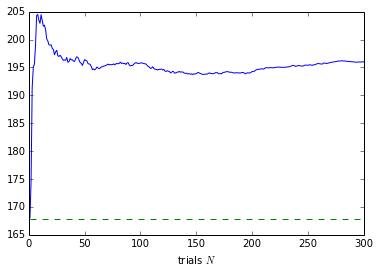

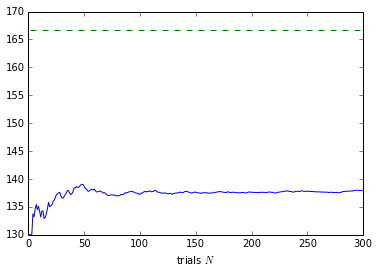

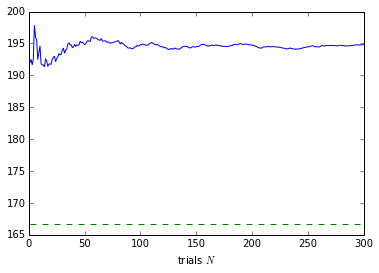

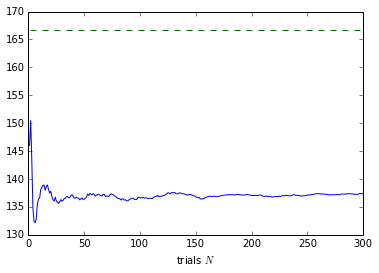

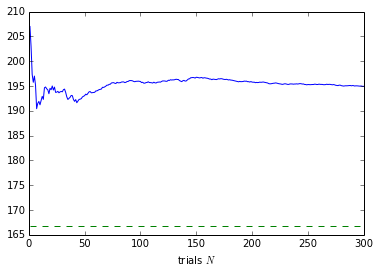

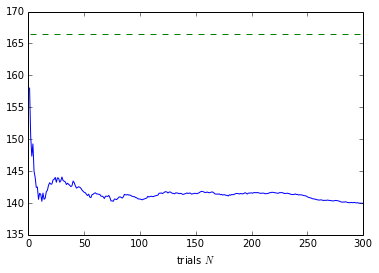

In [6]:
n = 6 # a number of participants
K = 1000 # max time


N = 300 # trial for averaging

p = np.random.rand(n) # random probability P_{X}: prob X
s = np.sum(p)
pp = p/s
P = []
for i in range(n):
    P.append(np.roll(pp, i))
P = np.reshape(P, (n,n))

i = 0 # initial value

f = cal_f(n, P, K)
print f[i]
print reduce(operator.add, f[i])

_N = 0
_ave = [[] for _i in range(n)]
c = collections.Counter()
while _N < N:
    c = c + collections.Counter(circle_walk(P, n, i, K))
    _N += 1
    for k, v in dict(c).items():
        _ave[k].append(float(v)/_N)
last = [_ave[a][-1] for a in range(n)]
print last
print reduce(operator.add, last)
        
def plot_for_j(j):
    plt.plot(range(1, N+1), _ave[j])
    plt.plot([1, N], [f[i][j], f[i][j]], '--')
    plt.xlabel(r'trials $N$')
    plt.ylabel(r'')
    plt.show()

for j in range(n):
    plot_for_j(j)

どう見ても別の値で収束している???

ともかく(?)、このようにマルコフ連鎖としてこの状況をとらえたとき、距離の効果を入れるなら、遷移確率にその効果を埋め込むことが出来る。このとき確率$p(i,j)$と$p(j,i)$は一般には異なっていても良い。



参考になる?[計算機実習 問題12.16 拡散が支配する1次元化学反応系のモンテカルロ・シミュレーション](http://nbviewer.ipython.org/github/ssh0/12-16_diffusion-dominant_chemical_reaction/blob/master/12-16_diffusion-dominant_chemical_reaction.ipynb)